In [1]:
import importlib
import processing
importlib.reload(processing)


<module 'processing' from 'c:\\Users\\dumas\\PycharmProjects\\Credit\\Credit-Risk-Project\\processing.py'>

In [2]:
from processing import load_segment_and_global_data, load_macro_data, describe_dataframe

segment_path = 'data/Données_CCF_PAR_SEGMENT.csv'
global_path = 'data/Données_CCF_SERIE_GLOBALE_VF.csv'
macro_path = 'data/macrovariables/historique_macro_variables_projet_CCF_FowardLooking_IFRS9.xlsx'

df_segment, df_global = load_segment_and_global_data(segment_path, global_path)
df_macro = load_macro_data(macro_path)

describe_dataframe(df_segment, "Segment")
describe_dataframe(df_global, "Global")
describe_dataframe(df_macro, "Macro")


=== Description de Segment ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cod_prd_ref            360 non-null    object
 1   note_ref               360 non-null    int64 
 2   Indicateur_moyen_Brut  360 non-null    object
 3   PourcNote              360 non-null    object
 4   PourcNoteCohorte       360 non-null    object
 5   PourcNoteCohorte5      360 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.0+ KB
None
      cod_prd_ref  note_ref Indicateur_moyen_Brut           PourcNote  \
0          2009T1         1           0,451962798  0,0128162511542013   
1          2009T1         2             0,9185154  0,0150016761649346   
2          2009T1         3           0,919842763  0,0188878742730812   
3          2009T1         4           1,275863582  0,0148540805032912   
4          2009T1         5         

c:\Users\dumas\PycharmProjects\Credit\Credit-Risk-Project\processing.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df[source_col].astype(str).str.strip().str.replace('T', 'Q'))


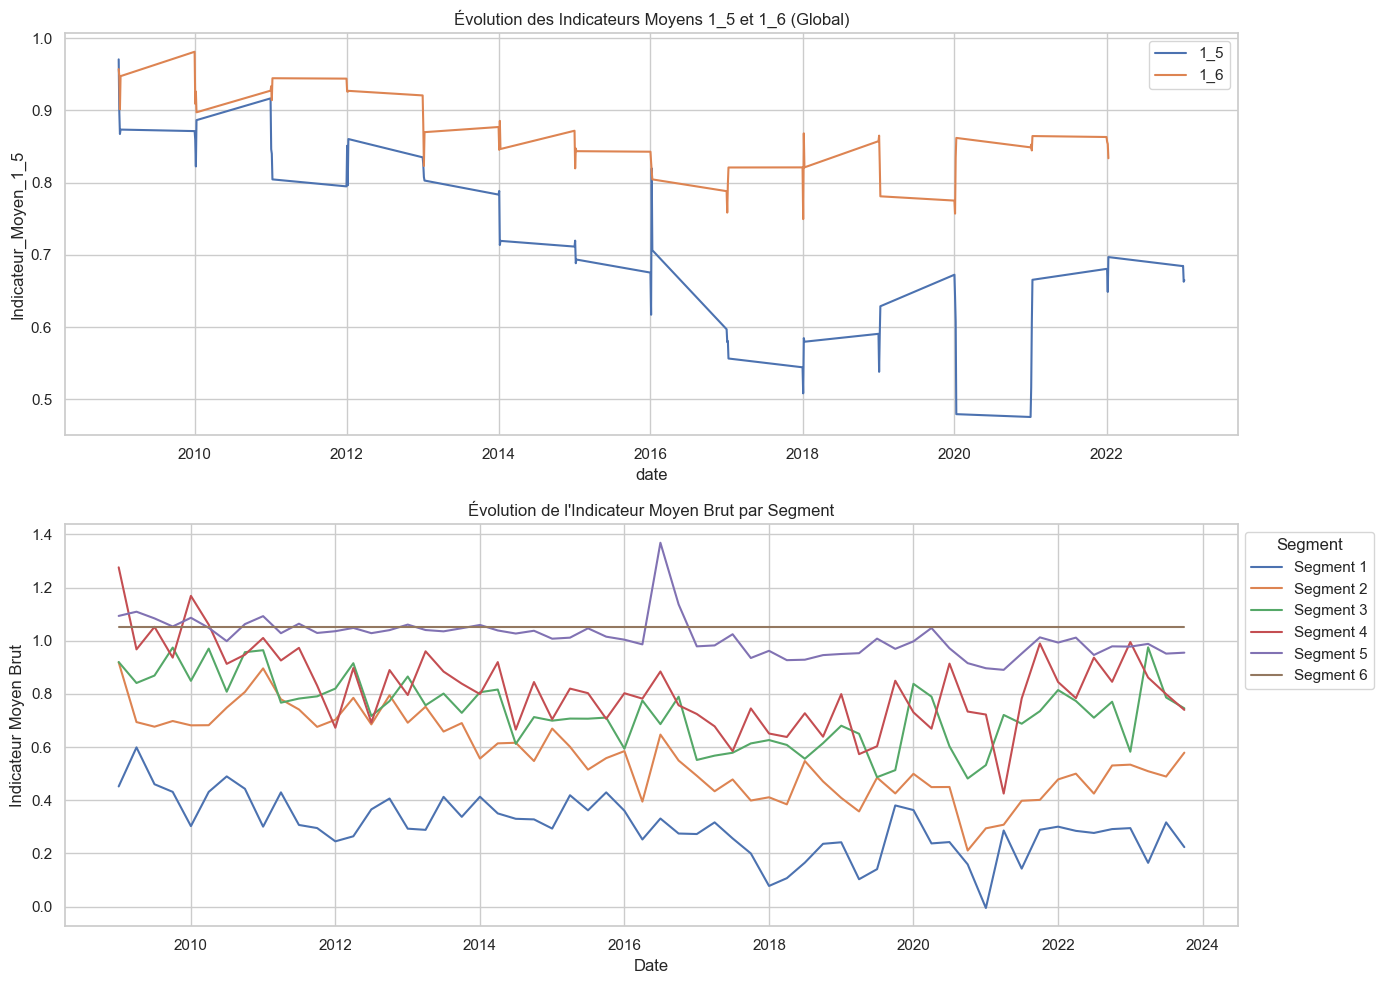

In [3]:
from processing import (
    clean_numeric_columns, convert_global_dates, convert_segment_dates,
    plot_ccf_global_and_segment
)

# Nettoyage
df_global = clean_numeric_columns(df_global, ['Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5', 'Indicateur_Moyen_1_6', 'Effectif_Pourc_1_6'])
df_segment = clean_numeric_columns(df_segment, ['Indicateur_moyen_Brut', 'PourcNote', 'PourcNoteCohorte', 'PourcNoteCohorte5'])

# Conversion des dates
df_global = convert_global_dates(df_global)
df_segment = convert_segment_dates(df_segment)

# Visualisation
plot_ccf_global_and_segment(df_global, df_segment)


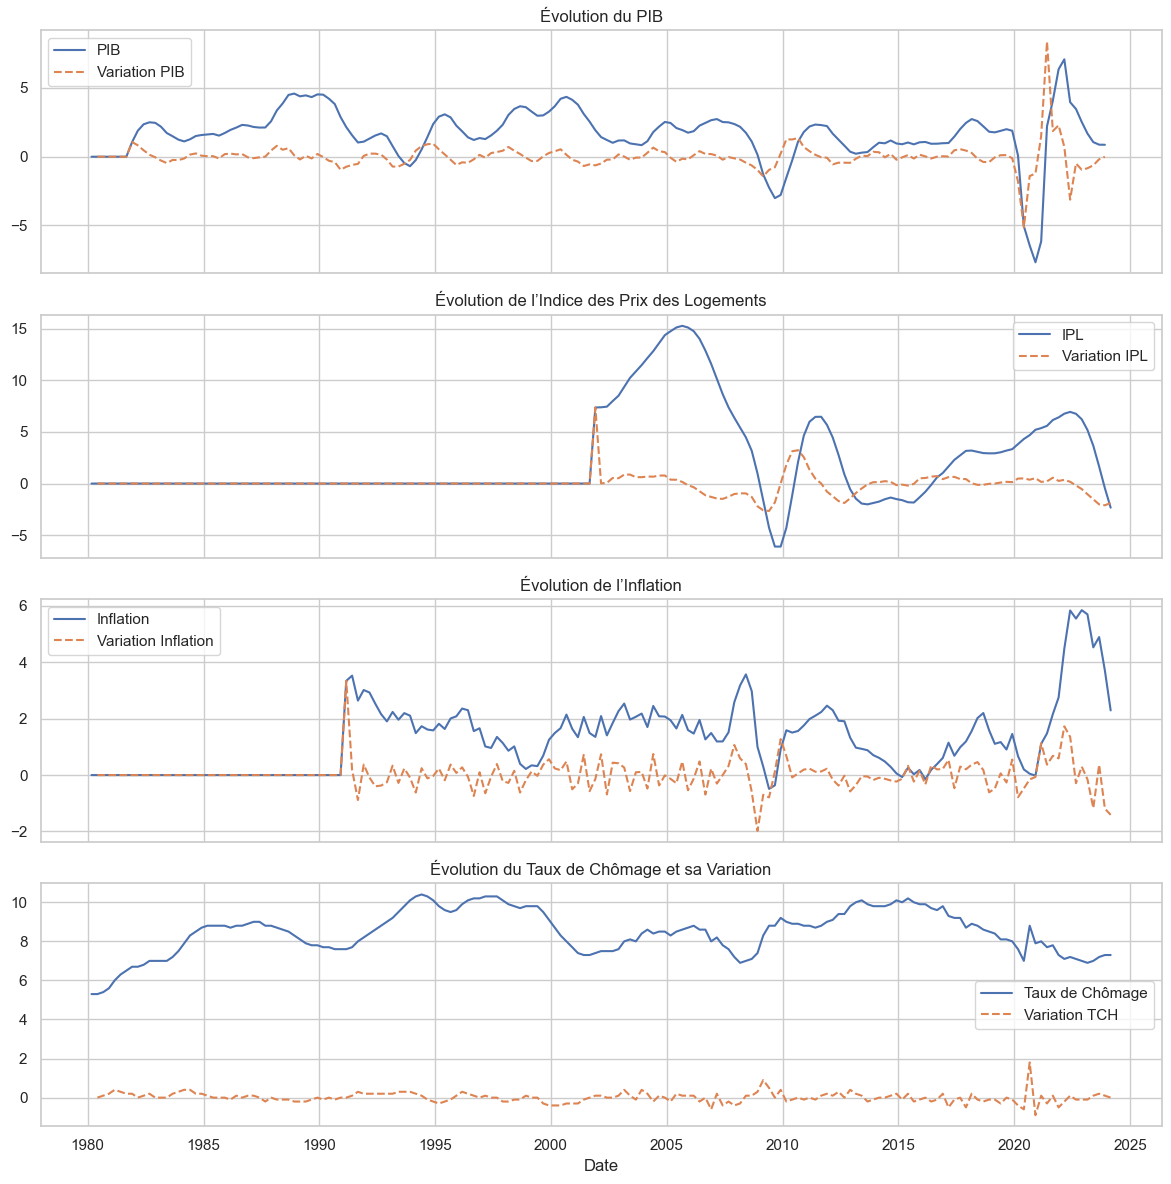

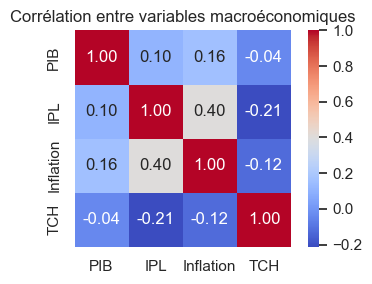

In [4]:
from processing import plot_macro_variables, plot_macro_correlation

plot_macro_variables(df_macro)
plot_macro_correlation(df_macro)


In [5]:
from processing import standardize_macro_dates, compare_dates_2009

df_macro = standardize_macro_dates(df_macro)
df_dates_2009 = compare_dates_2009(df_global, df_segment, df_macro)


  Dates df_global (2009) Dates df_segment (2009) Dates df_macro (2009)
0             2009-01-01              2009-01-01            2009-01-01
1             2009-01-04              2009-04-01            2009-04-01
2             2009-01-07              2009-07-01            2009-07-01
3             2009-01-10              2009-10-01            2009-10-01


In [6]:
from processing import create_merged_dataset

df_merged, df_merged_6 = create_merged_dataset(df_segment, df_macro)
df_merged.head()


Indicateur_moyen_Brut_1  Indicateur_moyen_Brut_2  \
date                                                           
2009-01-01                 0.451963                 0.918515   
2009-04-01                 0.598795                 0.693970   
2009-07-01                 0.460212                 0.676645   
2009-10-01                 0.431518                 0.697949   
2010-01-01                 0.302710                 0.681718   

            Indicateur_moyen_Brut_3  Indicateur_moyen_Brut_4  \
date                                                           
2009-01-01                 0.919843                 1.275864   
2009-04-01                 0.840965                 0.967390   
2009-07-01                 0.868909                 1.052081   
2009-10-01                 0.974173                 0.936315   
2010-01-01                 0.849149                 1.168515   

            Indicateur_moyen_Brut_5  Indicateur_moyen_Brut_6  \
date                                                           
2009-01-01                 1.093203                     1.05   
2009-04-01                 1.109015                     1.05   
2009-07-01                 1.083922                     1.05   
2009-10-01                 1.053459                     1.05   
2010-01-01                 1.086222                     1.05   

            PourcNoteCohorte5_1  PourcNoteCohorte5_2  PourcNoteCohorte5_3  \
date                                                                        
2009-01-01             0.115244             0.237795             0.130521   
2009-04-01             0.109356             0.254647             0.131660   
2009-07-01             0.100492             0.295740             0.142272   
2009-10-01             0.102461             0.265383             0.130819   
2010-01-01             0.109683             0.255927             0.143388   

            PourcNoteCohorte5_4  ...  TCH  Inflation  PIB_diff1  IPL_diff1  \
date                             ...                                         
2009-01-01             0.084689  ...  8.3   0.301692  -1.430885  -2.593841   
2009-04-01             0.101921  ...  8.8  -0.489570  -0.956314  -2.654313   
2009-07-01             0.091207  ...  8.8  -0.362976  -0.769164  -1.824787   
2009-10-01             0.098983  ...  9.2   0.914470   0.229433  -0.001851   
2010-01-01             0.103970  ...  9.0   1.589859   1.265167   1.827158   

            TCH_diff1  Inflation_diff1  PIB_lag1  IPL_lag1  Inflation_lag1  \
date                                                                         
2009-01-01        0.9        -0.697982  0.144097 -2.204378       -1.979658   
2009-04-01        0.5        -0.791262 -1.286788 -2.593841       -0.697982   
2009-07-01        0.0         0.126594 -2.243102 -2.654313       -0.791262   
2009-10-01        0.4         1.277447 -3.012266 -1.824787        0.126594   
2010-01-01       -0.2         0.675389 -2.782833 -0.001851        1.277447   

            TCH_lag1  
date                  
2009-01-01       0.3  
2009-04-01       0.9  
2009-07-01       0.5  
2009-10-01       0.0  
2010-01-01       0.4  

[5 rows x 24 columns]

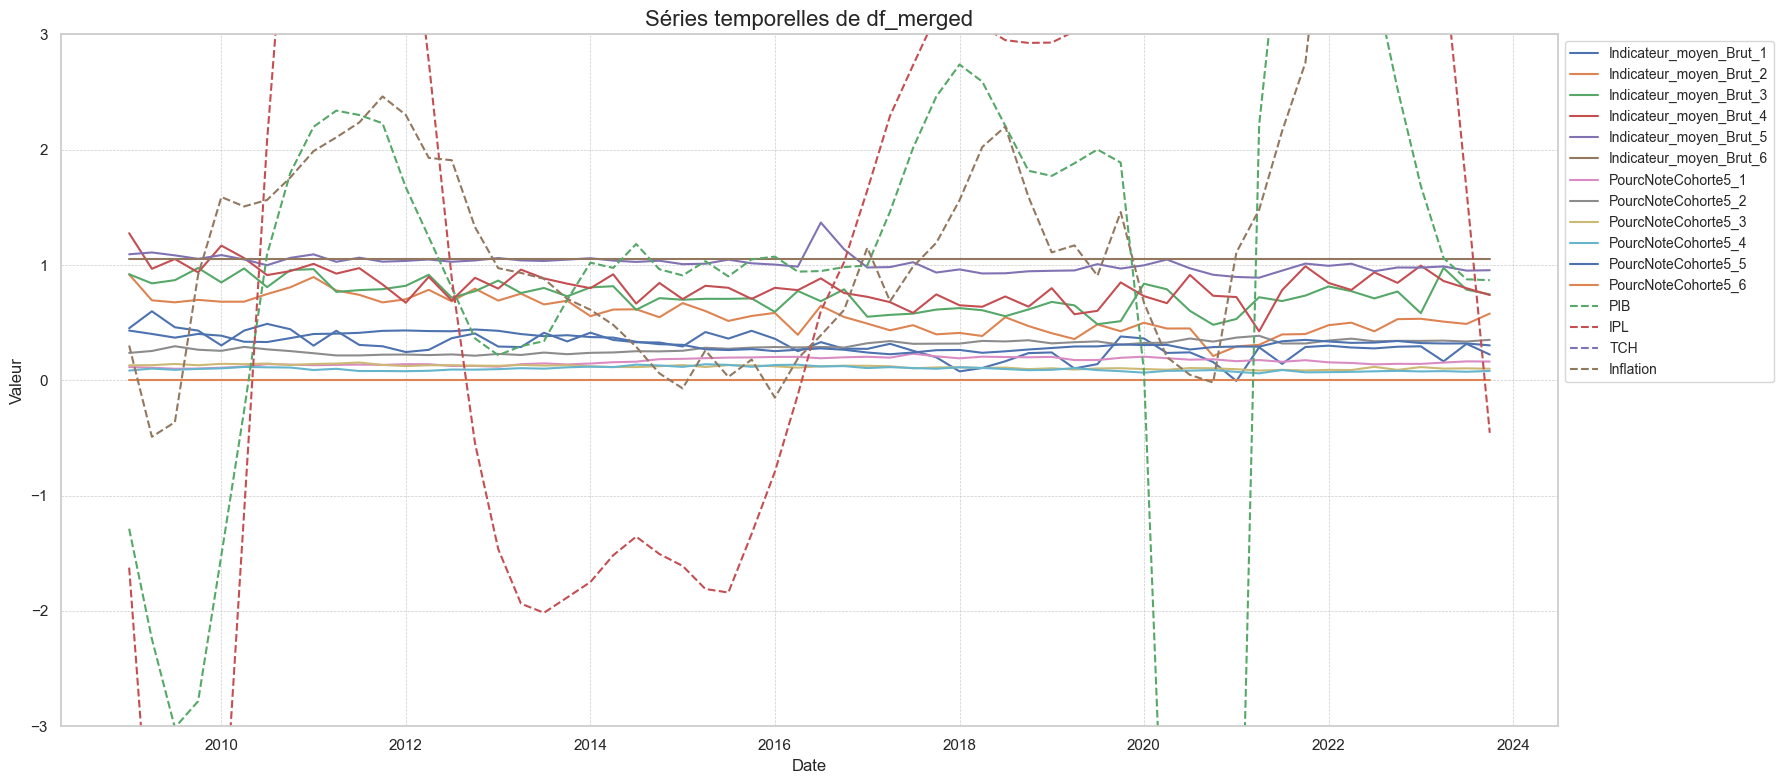

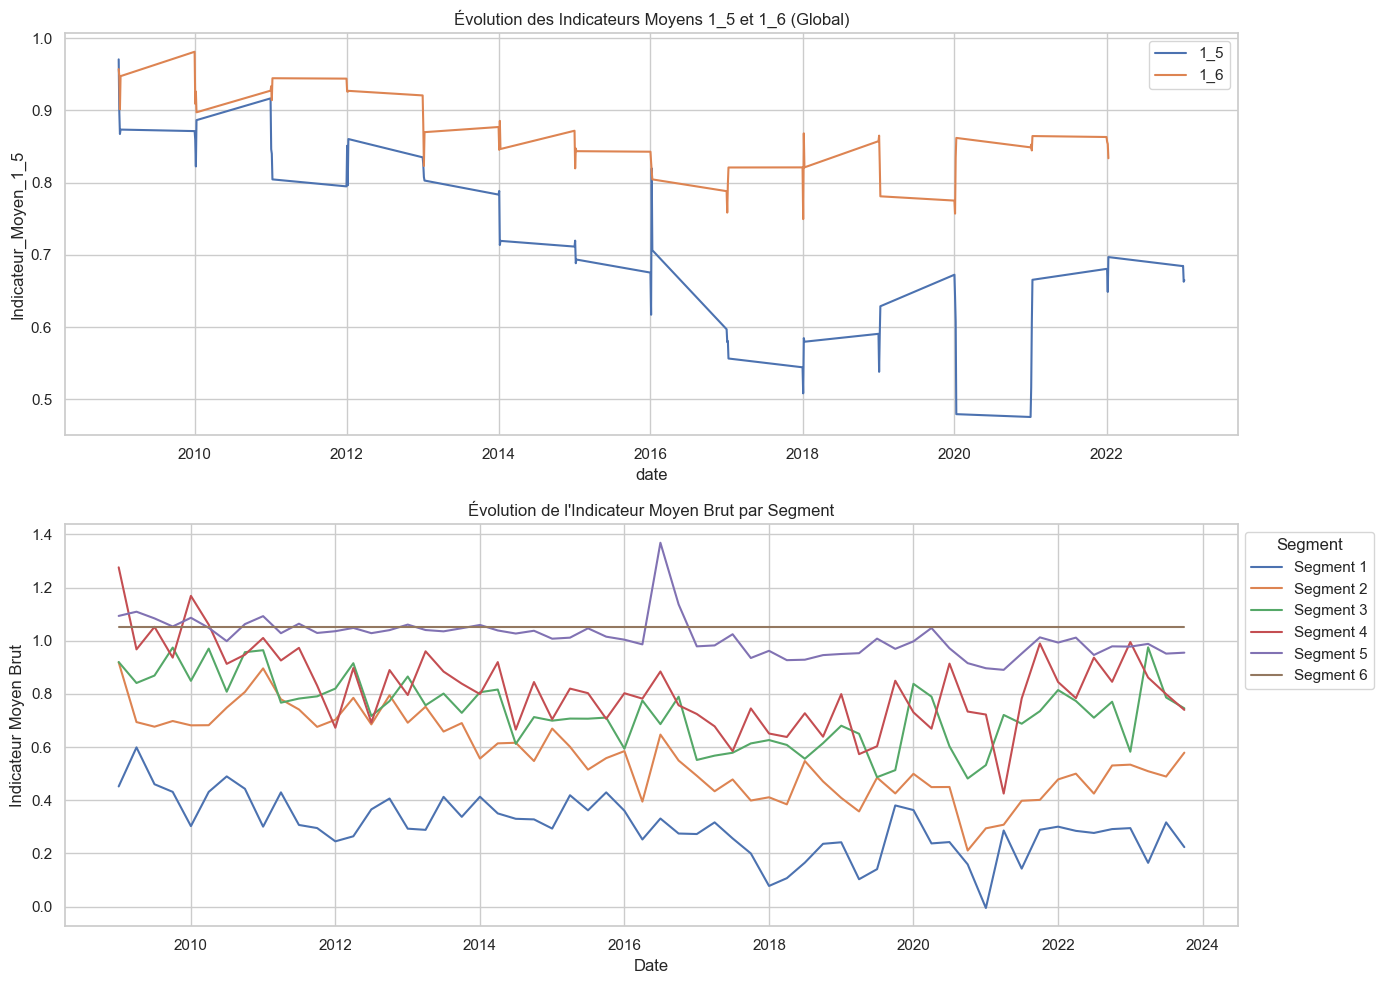

In [7]:
from processing import plot_merged_series, plot_global_and_segment_evolution

plot_merged_series(df_merged)
plot_global_and_segment_evolution(df_global, df_segment)


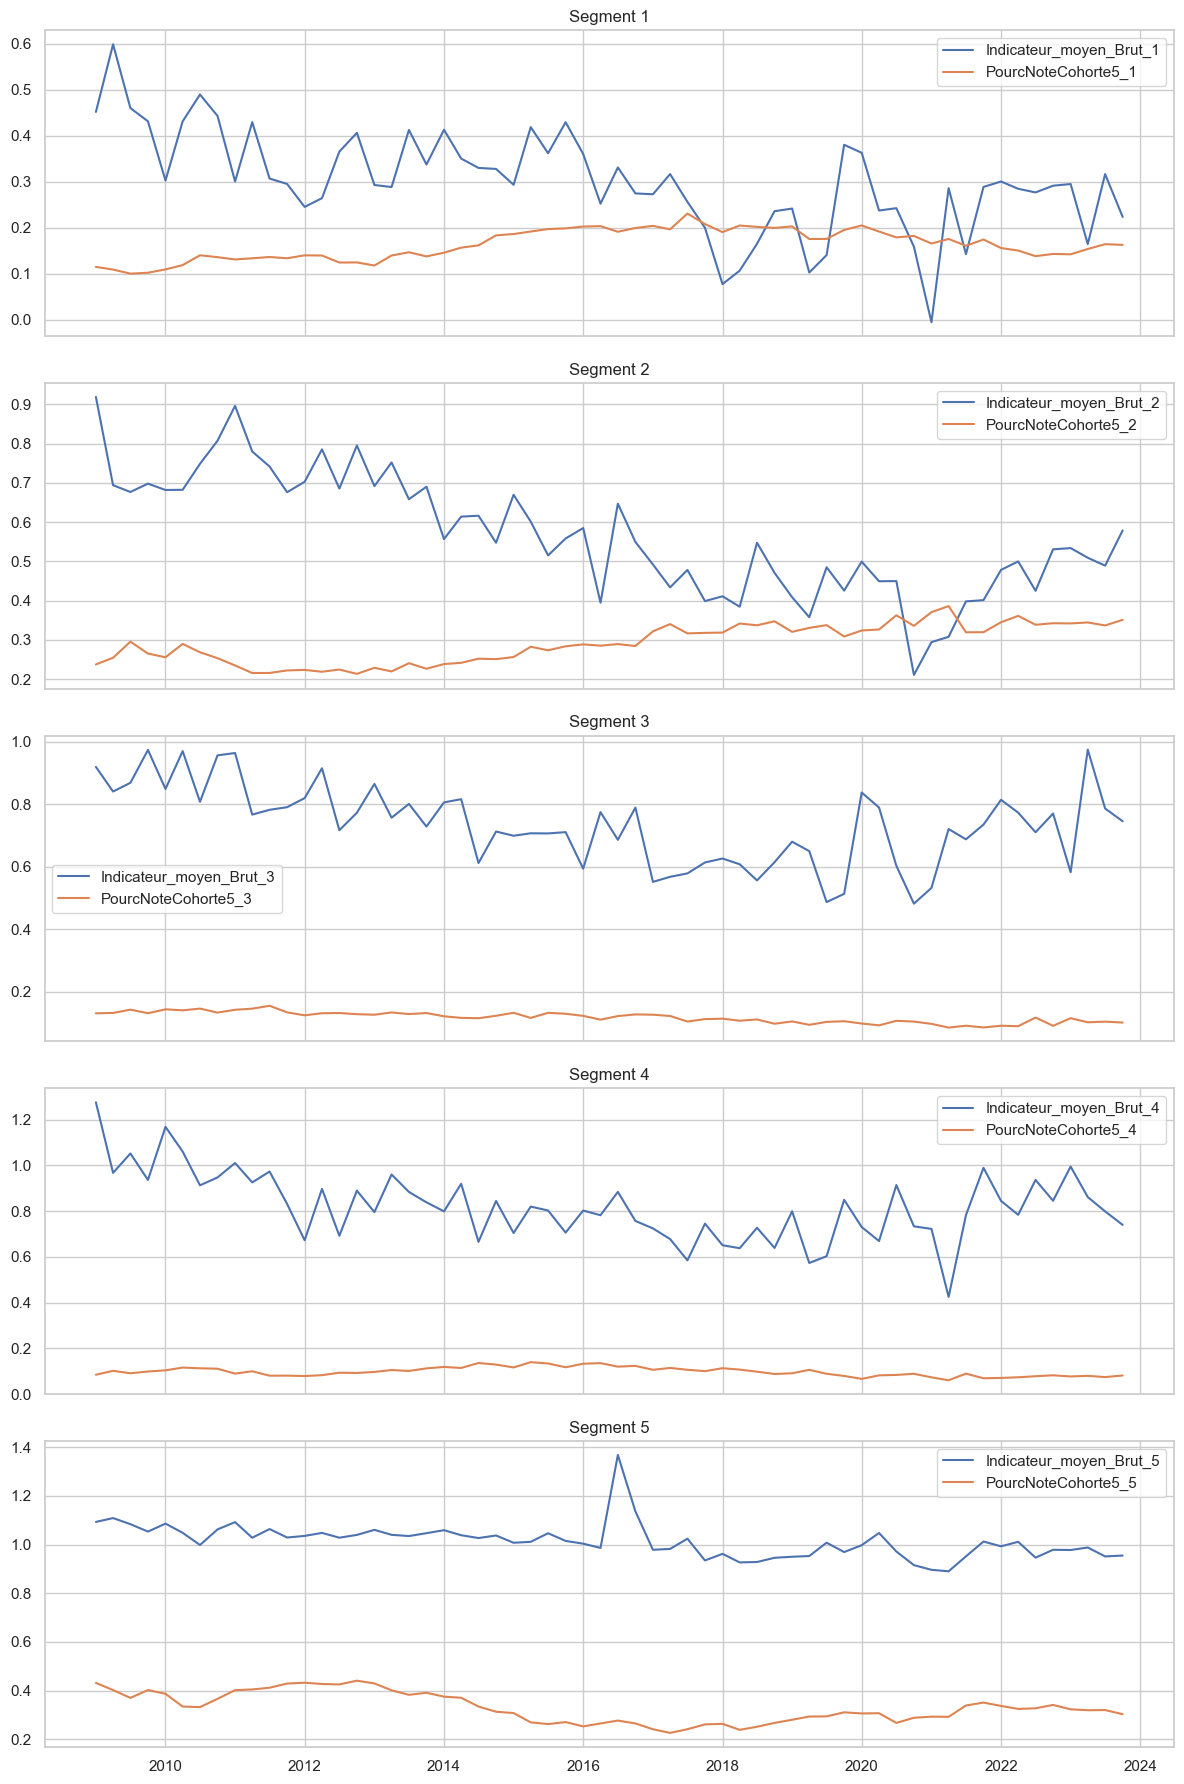

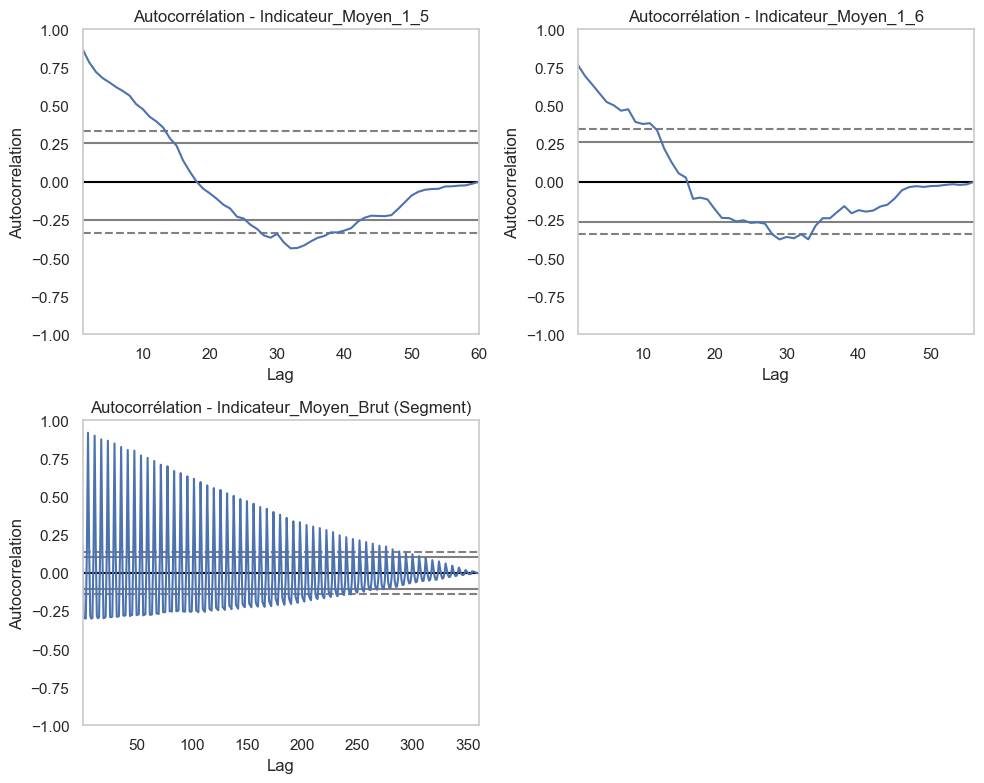

In [8]:
from processing import plot_pourc_note_vs_indicateur, plot_autocorrelations

plot_pourc_note_vs_indicateur(df_merged)
plot_autocorrelations(df_global, df_segment)


In [9]:
from processing import run_adf_tests_named, run_adf_tests_by_segment

# Global + brut
series_dict = {
    "Indicateur_Moyen_1_5": df_global["Indicateur_Moyen_1_5"],
    "Indicateur_Moyen_1_6": df_global["Indicateur_Moyen_1_6"],
    "Indicateur_Moyen_Brut": df_segment["Indicateur_moyen_Brut"]
}
adf_df_corrected = run_adf_tests_named(series_dict)
display(adf_df_corrected)

# Par segment
adf_segment_df = run_adf_tests_by_segment(df_segment)
display(adf_segment_df)


Série  ADF Statistic   p-value  Critique 1%  Critique 5%  \
0   Indicateur_Moyen_1_5      -2.371826  0.149847    -3.546395    -2.911939   
1   Indicateur_Moyen_1_6      -2.128698  0.233133    -3.557709    -2.916770   
2  Indicateur_Moyen_Brut      -2.053515  0.263612    -3.449616    -2.870028   

   Critique 10%  
0     -2.593652  
1     -2.596222  
2     -2.571292

Série  ADF Statistic   p-value  Critique 1%  Critique 5%  \
0  Indicateur_Moyen_Brut_1      -3.983272  0.001501    -3.546395    -2.911939   
1  Indicateur_Moyen_Brut_2      -1.833660  0.363883    -3.548494    -2.912837   
2  Indicateur_Moyen_Brut_3      -2.228654  0.196010    -3.565624    -2.920142   
3  Indicateur_Moyen_Brut_4      -5.324879  0.000005    -3.546395    -2.911939   
4  Indicateur_Moyen_Brut_5      -4.430622  0.000262    -3.546395    -2.911939   
5  Indicateur_Moyen_Brut_6            NaN       NaN          NaN          NaN   

   Critique 10%                       Note  
0     -2.593652                        NaN  
1     -2.594129                        NaN  
2     -2.598015                        NaN  
3     -2.593652                        NaN  
4     -2.593652                        NaN  
5           NaN  Constant series - skipped

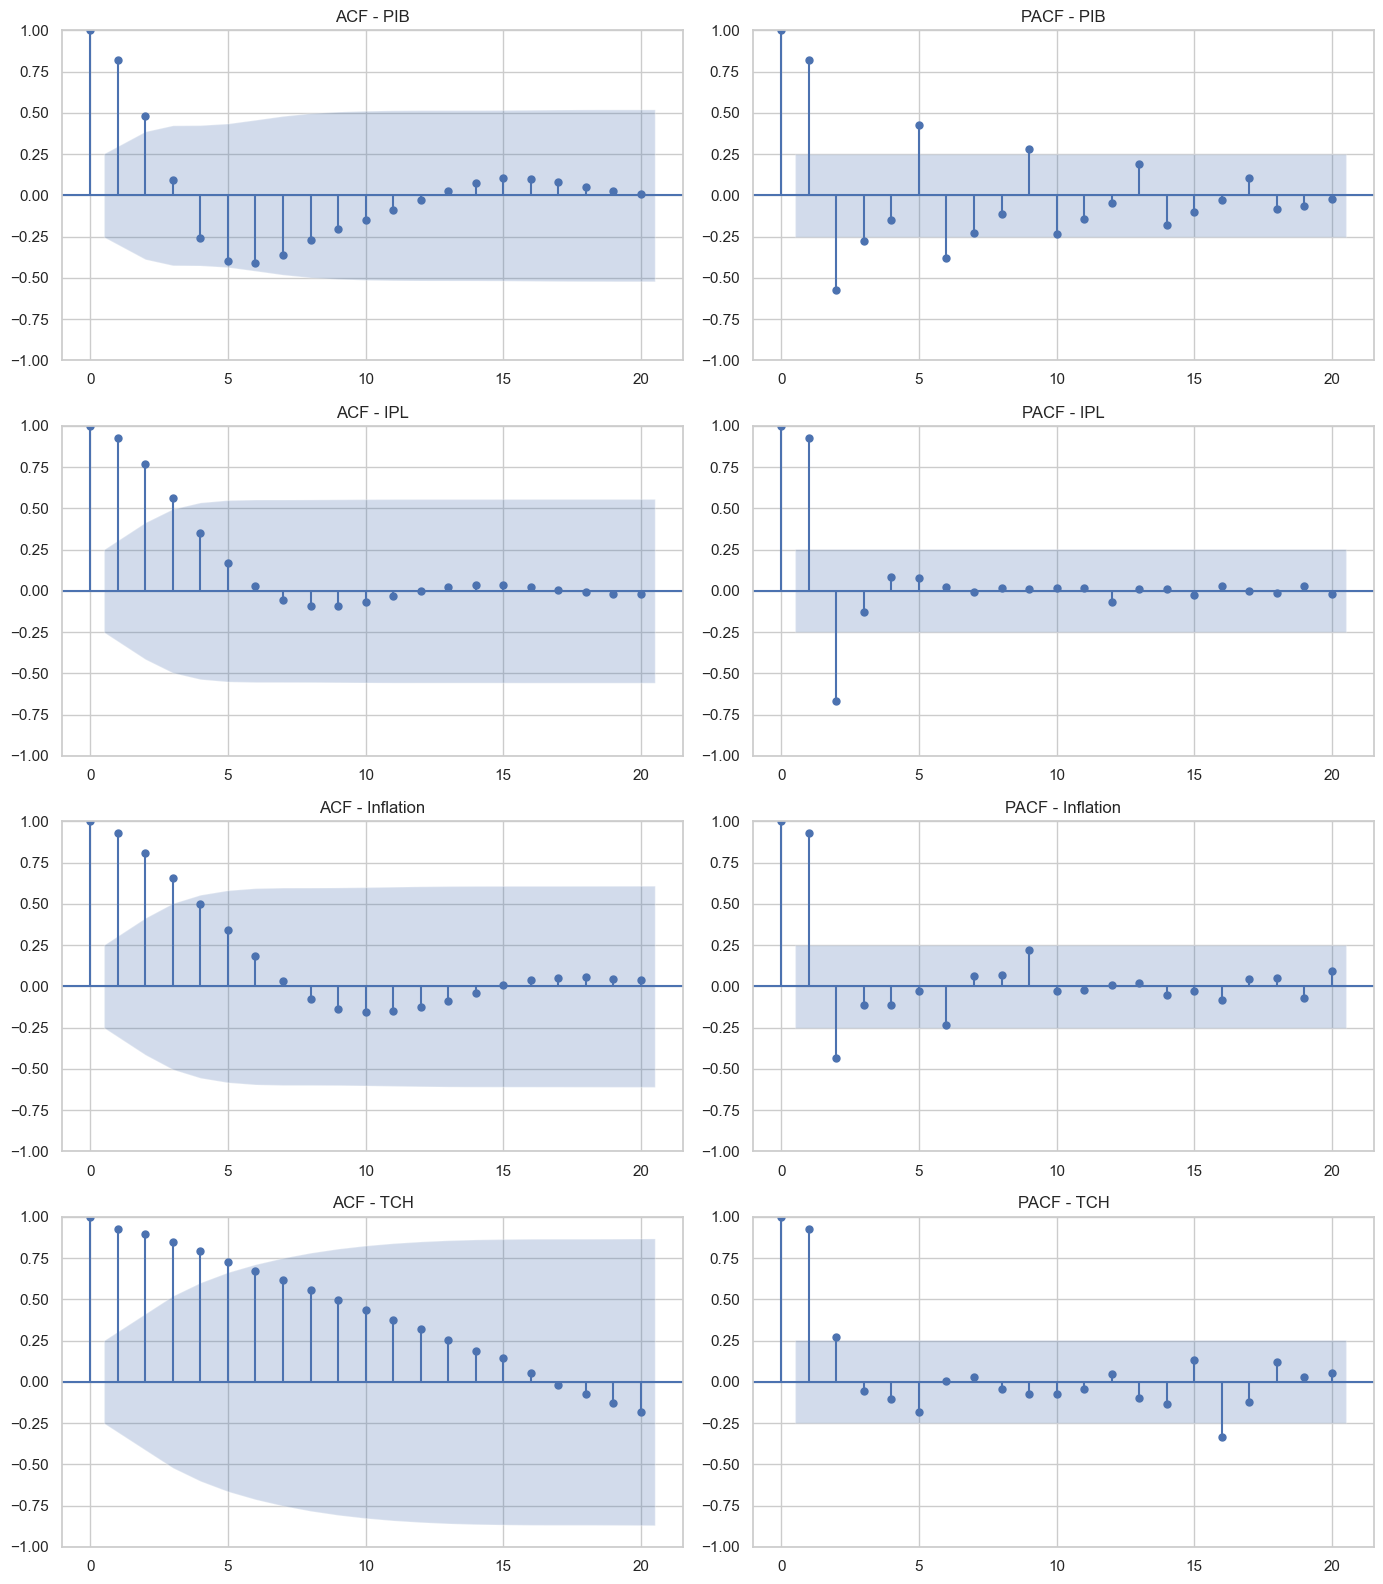

Variable  ADF Statistic   p-value  Critique 1%  Critique 5%  Critique 10%
0        PIB      -3.327967  0.013674    -3.571472    -2.922629     -2.599336
1        IPL      -1.542183  0.512550    -3.568486    -2.921360     -2.598662
2  Inflation      -1.320889  0.619562    -3.562879    -2.918973     -2.597393
3        TCH      -0.270556  0.929572    -3.546395    -2.911939     -2.593652

In [10]:
from processing import filter_macro_since_2009, analyze_macro_stationarity

df_macro = filter_macro_since_2009(df_macro)
adf_df_macro = analyze_macro_stationarity(df_macro)
display(adf_df_macro)


Série (log_diff)  ADF Statistic       p-value  Critique 1%  \
0  Indicateur_Moyen_1_5      -7.978240  2.666293e-12    -3.548494   
1  Indicateur_Moyen_1_6     -10.682798  3.901238e-19    -3.557709   

   Critique 5%  Critique 10%  
0    -2.912837     -2.594129  
1    -2.916770     -2.596222

Segment  ADF Statistic   p-value  Critique 1%  Critique 5%  Critique 10%
0  segment_2      -5.251563  0.000007    -3.557709    -2.916770     -2.596222
1  segment_3      -2.863254  0.049791    -3.565624    -2.920142     -2.598015

Segment  ADF Statistic   p-value  Critique 1%  Critique 5%  Critique 10%
0  segment_2      -5.156570  0.000011    -3.557709    -2.916770     -2.596222
1  segment_3      -1.275033  0.640516    -3.577848    -2.925338     -2.600774

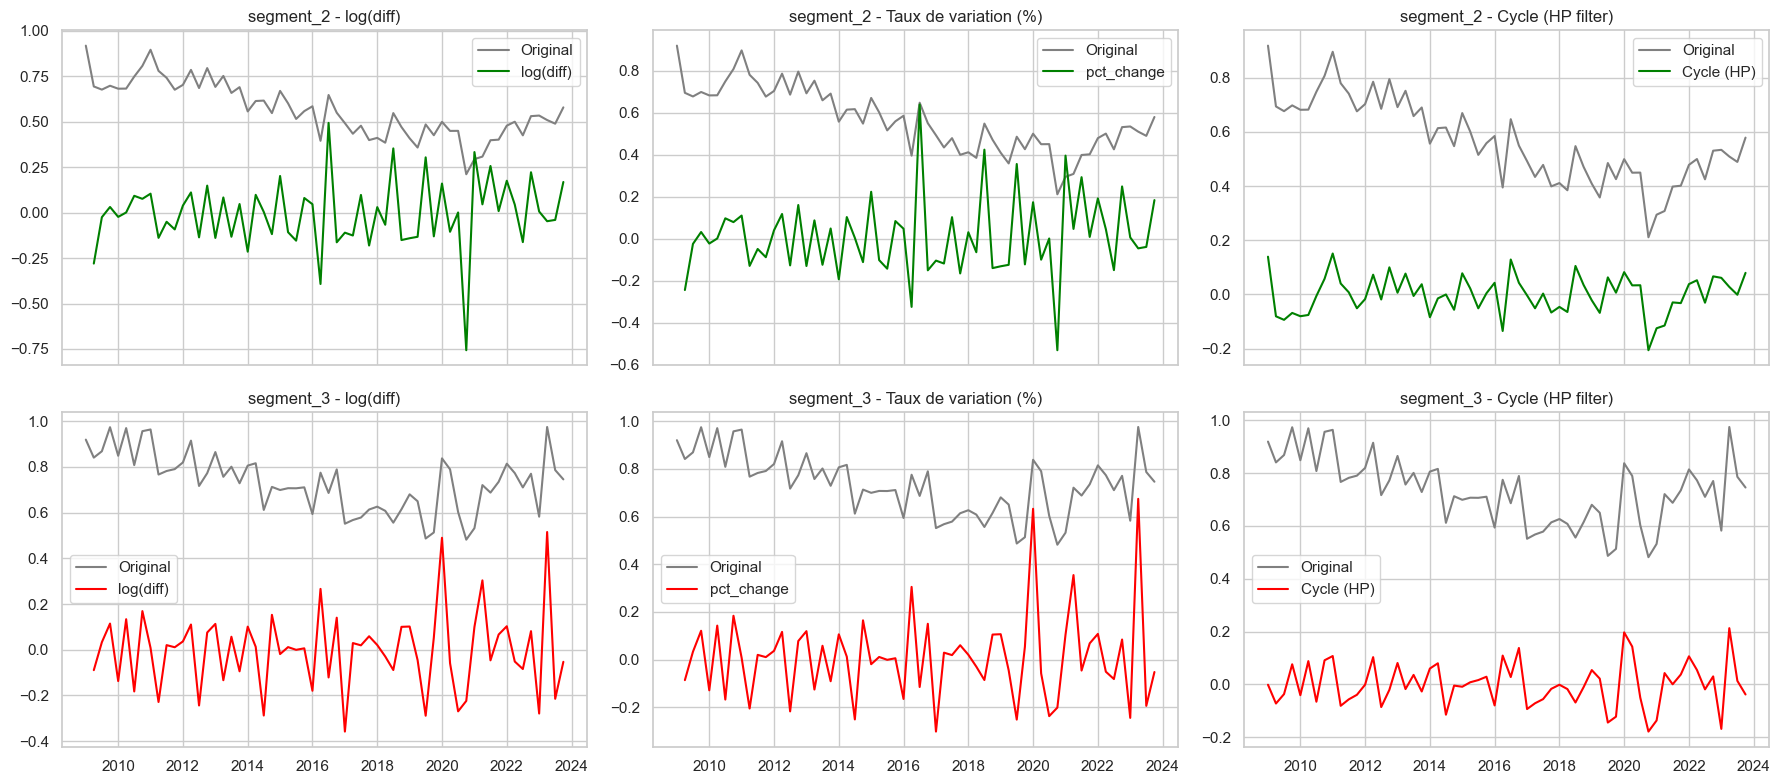

In [11]:
from processing import run_adf_logdiff, transform_and_test_segments, plot_transformed_segments
import pandas as pd 

# ADF sur log(diff) global
log_diff_dict = {
    "Indicateur_Moyen_1_5": df_global["Indicateur_Moyen_1_5"],
    "Indicateur_Moyen_1_6": df_global["Indicateur_Moyen_1_6"]
}
df_adf_logdiff = run_adf_logdiff(log_diff_dict)
display(df_adf_logdiff)


segments_dfs = {
    f"segment_{i}": df_segment[df_segment["note_ref"] == i].reset_index(drop=True)
    for i in sorted(df_segment["note_ref"].unique())
}

results = transform_and_test_segments({k: v for k, v in segments_dfs.items() if k in ["segment_2", "segment_3"]})

logdiff_dfs = results["logdiff"]
pctchange_dfs = results["pctchange"]
hp_cycle_dfs = results["hpfilter"]
# Résumés ADF
display(pd.DataFrame(results["adf_logdiff"]))
display(pd.DataFrame(results["adf_pctchange"]))

# Visualisation
plot_transformed_segments(segments_dfs, results["logdiff"], results["pctchange"], results["hpfilter"])


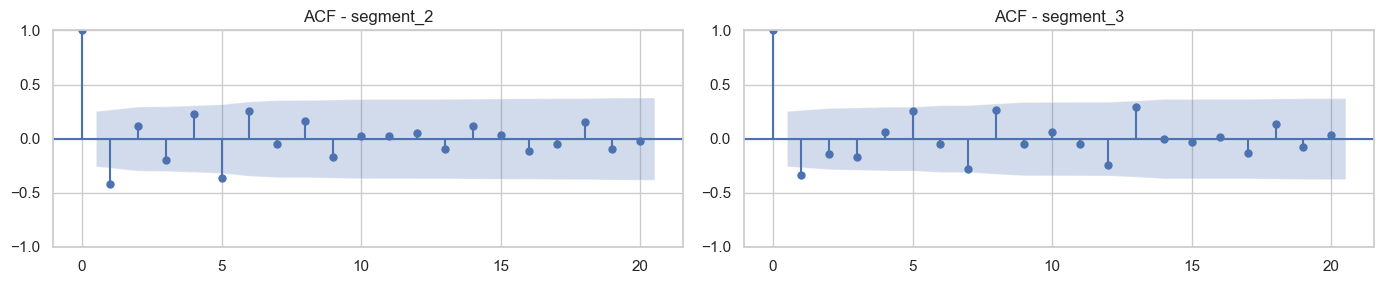

Segment  ADF Statistic   p-value  Critique 1%  Critique 5%  Critique 10%
0  segment_2      -5.156570  0.000011    -3.557709    -2.916770     -2.596222
1  segment_3      -2.863254  0.049791    -3.565624    -2.920142     -2.598015

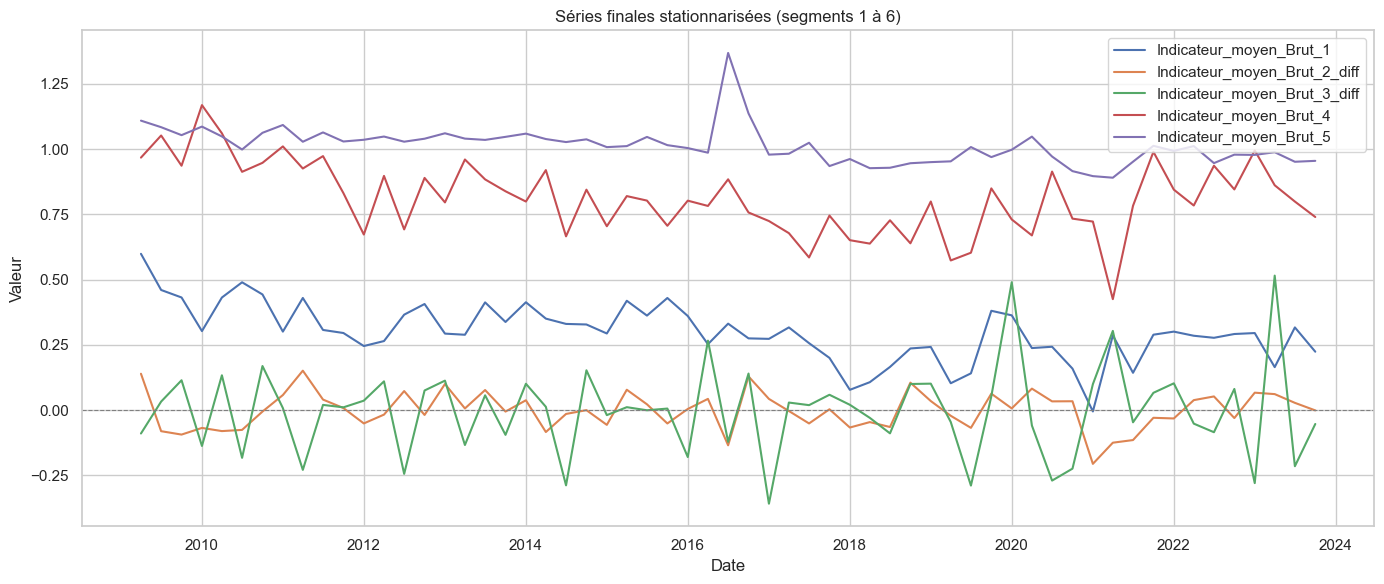

In [12]:
from processing import recheck_stationarity, inject_transformed_segments, plot_final_stationary_series

# Re-check des séries finales
series_finales = {
    "segment_2": pctchange_dfs["segment_2"]["pct_change"],
    "segment_3": logdiff_dfs["segment_3"]["log_diff"]
}
adf_final = recheck_stationarity(series_finales)
display(adf_final)

# Injection dans df_merged
df_merged = inject_transformed_segments(df_merged, segments_dfs, logdiff_dfs, hp_cycle_dfs)

# Visualisation
plot_final_stationary_series(df_merged)


In [13]:
df_merged = df_merged.iloc[1:].reset_index(drop=True)

df_merged["Indicateur_moyen_Brut_2_diff"] = hp_cycle_dfs["segment_2"]["cycle"].reset_index(drop=True)
df_merged["Indicateur_moyen_Brut_3_diff"] = logdiff_dfs["segment_3"]["log_diff"].reset_index(drop=True)

# Réattribuer les dates comme index
df_merged["date"] = segments_dfs["segment_1"]["date"].iloc[1:].reset_index(drop=True)
df_merged.set_index("date", inplace=True)

df_merged.head()

Indicateur_moyen_Brut_1  Indicateur_moyen_Brut_2  \
date                                                           
2009-04-01                 0.460212                 0.676645   
2009-07-01                 0.431518                 0.697949   
2009-10-01                 0.302710                 0.681718   
2010-01-01                 0.431341                 0.682243   
2010-04-01                 0.489686                 0.748289   

            Indicateur_moyen_Brut_3  Indicateur_moyen_Brut_4  \
date                                                           
2009-04-01                 0.868909                 1.052081   
2009-07-01                 0.974173                 0.936315   
2009-10-01                 0.849149                 1.168515   
2010-01-01                 0.970323                 1.060566   
2010-04-01                 0.808149                 0.912926   

            Indicateur_moyen_Brut_5  Indicateur_moyen_Brut_6  \
date                                                           
2009-04-01                 1.083922                     1.05   
2009-07-01                 1.053459                     1.05   
2009-10-01                 1.086222                     1.05   
2010-01-01                 1.048449                     1.05   
2010-04-01                 0.998391                     1.05   

            PourcNoteCohorte5_1  PourcNoteCohorte5_2  PourcNoteCohorte5_3  \
date                                                                        
2009-04-01             0.100492             0.295740             0.142272   
2009-07-01             0.102461             0.265383             0.130819   
2009-10-01             0.109683             0.255927             0.143388   
2010-01-01             0.119090             0.289894             0.140071   
2010-04-01             0.140394             0.268781             0.145628   

            PourcNoteCohorte5_4  ...  PIB_diff1  IPL_diff1  TCH_diff1  \
date                             ...                                    
2009-04-01             0.091207  ...  -0.769164  -1.824787        0.0   
2009-07-01             0.098983  ...   0.229433  -0.001851        0.4   
2009-10-01             0.103970  ...   1.265167   1.827158       -0.2   
2010-01-01             0.116135  ...   1.254077   3.128783       -0.1   
2010-04-01             0.112993  ...   1.356586   3.229508        0.0   

            Inflation_diff1  PIB_lag1  IPL_lag1  Inflation_lag1  TCH_lag1  \
date                                                                        
2009-04-01         0.126594 -2.243102 -2.654313       -0.791262       0.5   
2009-07-01         1.277447 -3.012266 -1.824787        0.126594       0.0   
2009-10-01         0.675389 -2.782833 -0.001851        1.277447       0.4   
2010-01-01        -0.081838 -1.517665  1.827158        0.675389      -0.2   
2010-04-01         0.056320 -0.263588  3.128783       -0.081838      -0.1   

            Indicateur_moyen_Brut_2_diff  Indicateur_moyen_Brut_3_diff  
date                                                                    
2009-04-01                      0.139372                     -0.089653  
2009-07-01                     -0.080759                      0.032688  
2009-10-01                     -0.093756                      0.114351  
2010-01-01                     -0.068248                     -0.137355  
2010-04-01                     -0.080378                      0.133395  

[5 rows x 26 columns]

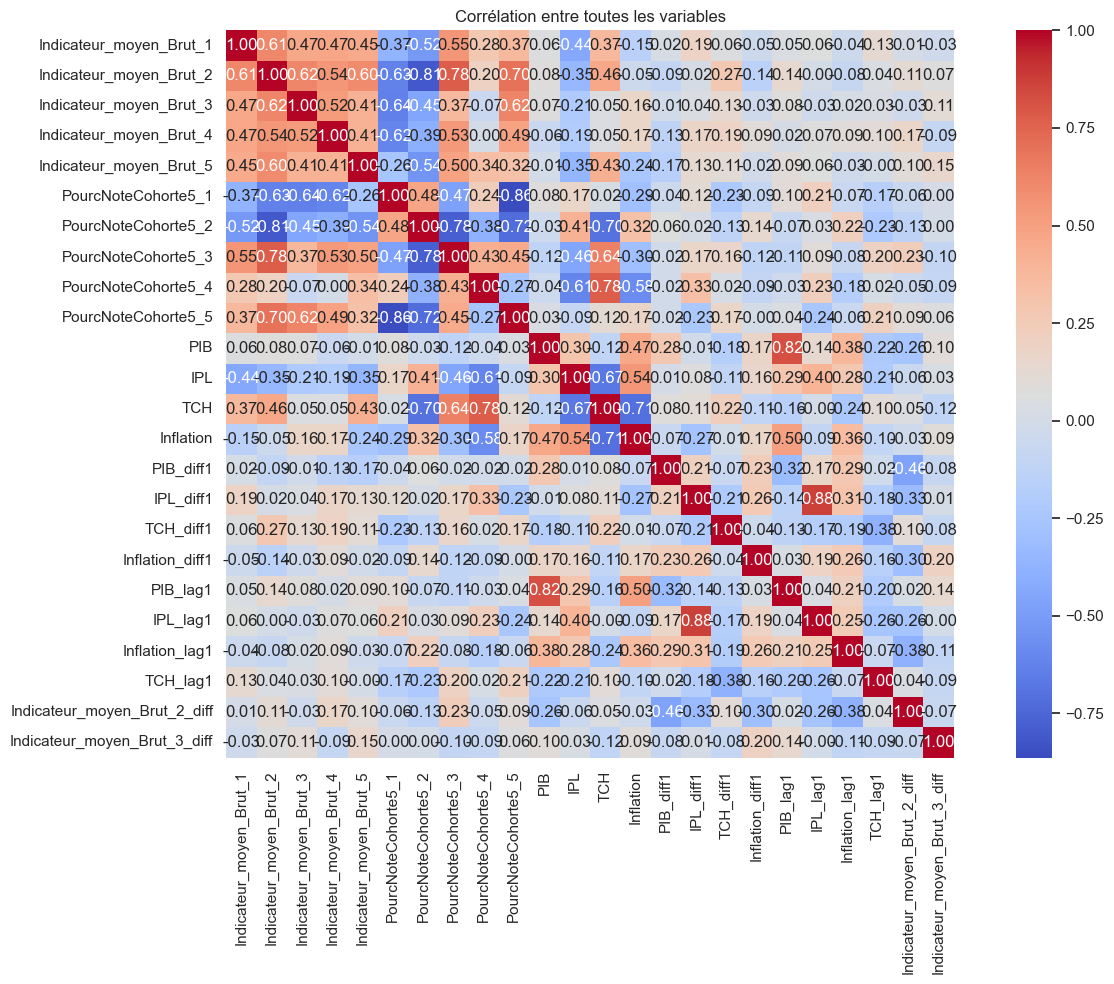

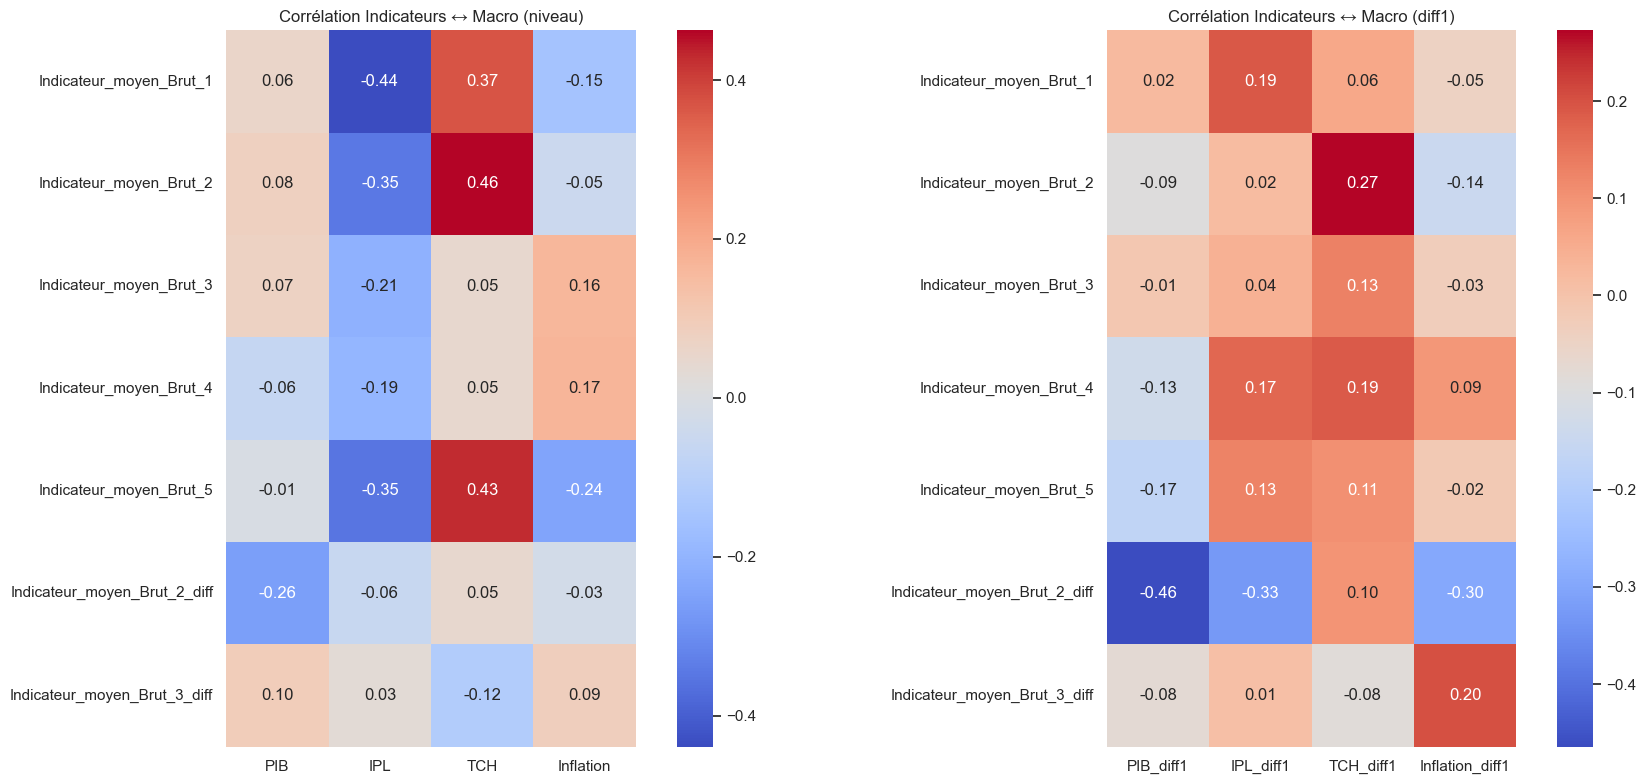

In [14]:
from processing import drop_unused_columns, plot_full_correlation_matrix, plot_correlation_with_macro

df_merged = drop_unused_columns(df_merged)

plot_full_correlation_matrix(df_merged)

correlation_macro, correlation_macro_diff = plot_correlation_with_macro(df_merged)


In [15]:
import importlib
import model
importlib.reload(model)

<module 'model' from 'c:\\Users\\dumas\\PycharmProjects\\Credit\\Credit-Risk-Project\\model.py'>

In [16]:
# %%
from model import create_macro_features, WLSModelEvaluator
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = df_merged.copy()
df = create_macro_features(df)

# Sélection des variables macro pertinentes
macro_vars = [
    'PIB_to_IPL', 'TCH_ma3', 'Inflation_acc', 'TCH_volatility', 'TCH_diff1',
    'PIBxInflation', 'InflationxTCH', 'TCH_to_Inflation', 'IPL_to_TCH',
    'Inflation_growth_3q', 'recession_flag', 'pre_covid'
]

segments = [
    'Indicateur_moyen_Brut_1', 'Indicateur_moyen_Brut_2_diff',
    'Indicateur_moyen_Brut_3_diff', 'Indicateur_moyen_Brut_4',
    'Indicateur_moyen_Brut_5'
]

# Nettoyage
df = df.dropna(subset=segments + macro_vars).copy()
df_filtered = df.dropna(subset=macro_vars).copy()

# VIF
X = df_filtered[macro_vars]
X_const = add_constant(X)
vif_data = pd.DataFrame({
    'variable': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})
display(vif_data.sort_values(by='VIF', ascending=False))


variable        VIF
0                 const  11.479625
5             TCH_diff1   4.496044
4        TCH_volatility   4.077995
2               TCH_ma3   3.968120
8      TCH_to_Inflation   3.475927
7         InflationxTCH   2.864891
11       recession_flag   2.626839
10  Inflation_growth_3q   2.440983
6         PIBxInflation   2.251846
12            pre_covid   1.844483
3         Inflation_acc   1.396103
9            IPL_to_TCH   1.235893
1            PIB_to_IPL   1.132178

Modèle pour : Indicateur_moyen_Brut_1
                               WLS Regression Results                              
Dep. Variable:     Indicateur_moyen_Brut_1   R-squared:                       0.130
Model:                                 WLS   Adj. R-squared:                 -0.058
Method:                      Least Squares   F-statistic:                    0.6904
Date:                     Tue, 27 May 2025   Prob (F-statistic):              0.697
Time:                             11:00:36   Log-Likelihood:                 51.874
No. Observations:                       46   AIC:                            -85.75
Df Residuals:                           37   BIC:                            -69.29
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

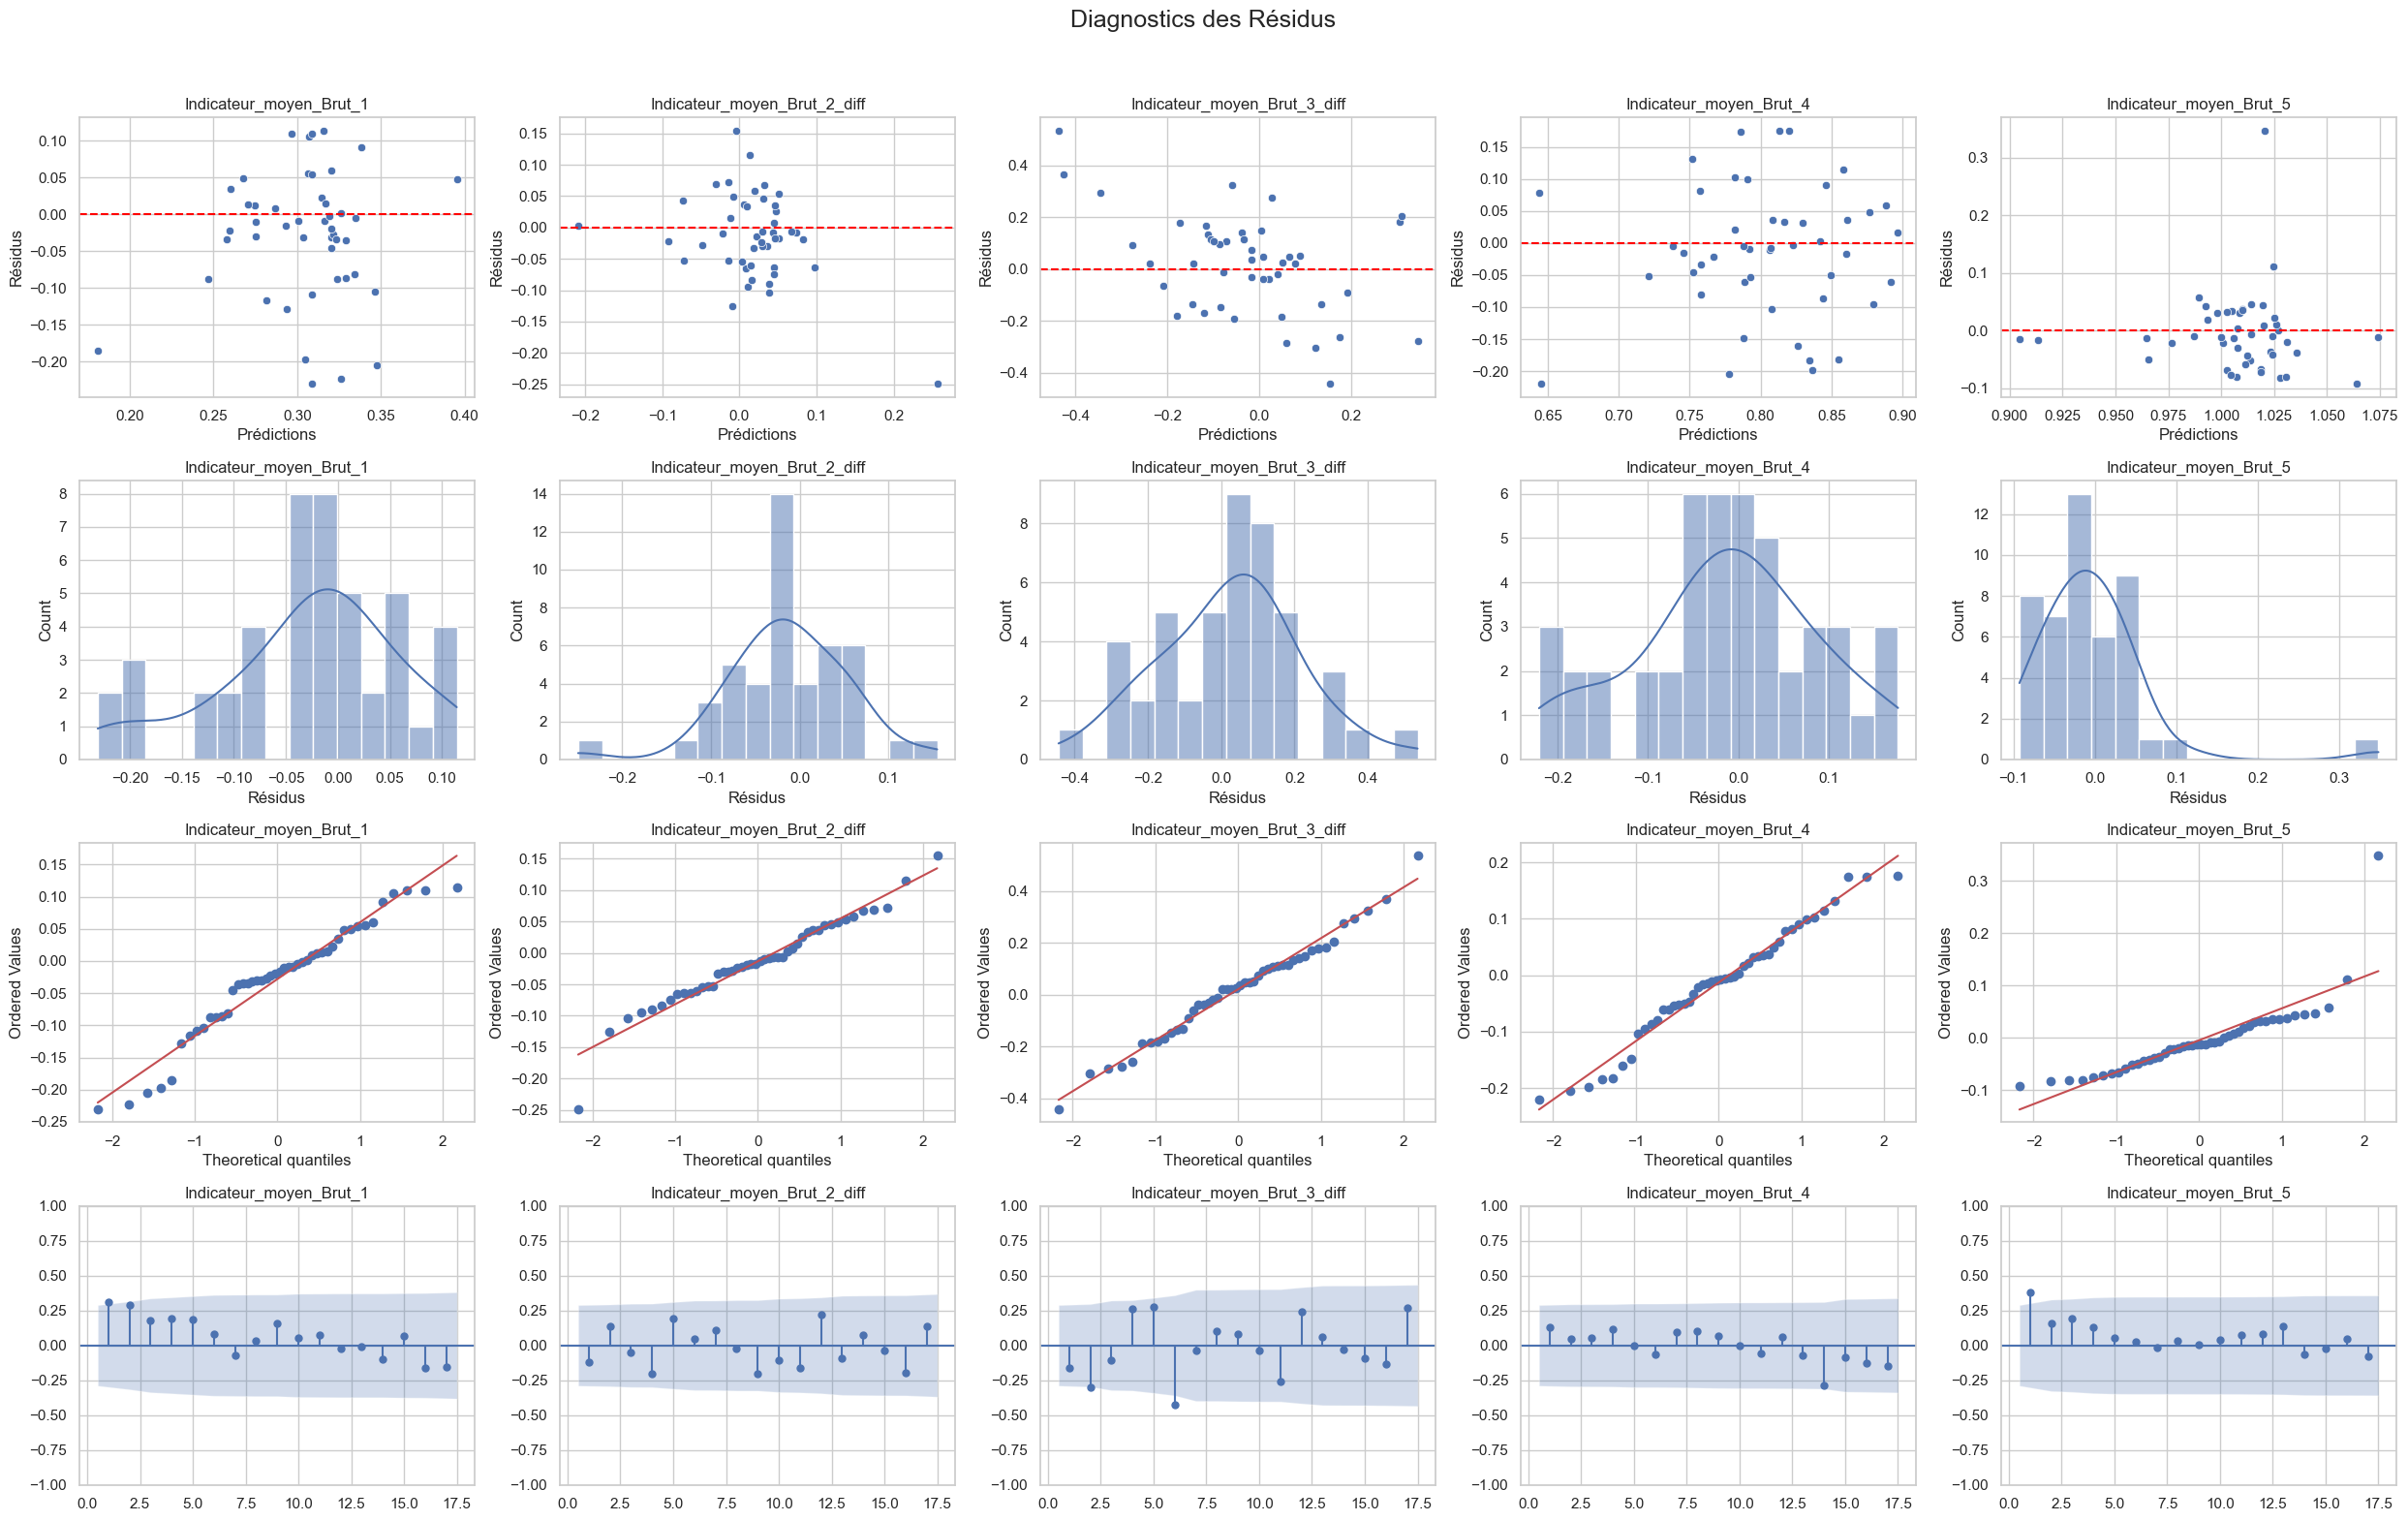

In [17]:
# %%
from model import WLSModelEvaluator

macro_vars = ['PIB', 'IPL_diff1', 'Inflation_diff1', 'TCH_diff1',
              'PIB_lag1', 'IPL_lag1', 'Inflation_lag1', 'TCH_lag1']

segments = [
    'Indicateur_moyen_Brut_1',
    'Indicateur_moyen_Brut_2_diff',
    'Indicateur_moyen_Brut_3_diff',
    'Indicateur_moyen_Brut_4',
    'Indicateur_moyen_Brut_5'
]

evaluator = WLSModelEvaluator(df, macro_vars, segments)
evaluator.fit_models()
evaluator.display_results()
evaluator.plot_diagnostics()


In [18]:
from model import create_macro_features, compute_vif

df = create_macro_features(df)

macro_vars = [
    'PIB_to_IPL', 'TCH_ma3', 'Inflation_acc', 'TCH_volatility', 'TCH_diff1',
    'PIBxInflation', 'InflationxTCH', 'TCH_to_Inflation', 'IPL_to_TCH',
    'Inflation_growth_3q', 'recession_flag', 'pre_covid'
]

segments = [
    'Indicateur_moyen_Brut_1',
    'Indicateur_moyen_Brut_2_diff',
    'Indicateur_moyen_Brut_3_diff',
    'Indicateur_moyen_Brut_4',
    'Indicateur_moyen_Brut_5'
]

# Nettoyage
df = df.dropna(subset=segments + macro_vars).copy()

# VIF
vif_data = compute_vif(df, macro_vars)
display(vif_data)


variable        VIF
0                 const  10.846116
5             TCH_diff1   4.709005
2               TCH_ma3   3.851373
8      TCH_to_Inflation   3.619930
4        TCH_volatility   3.002420
7         InflationxTCH   2.130221
6         PIBxInflation   2.115651
11       recession_flag   2.012919
12            pre_covid   1.788586
10  Inflation_growth_3q   1.614462
3         Inflation_acc   1.479904
9            IPL_to_TCH   1.387017
1            PIB_to_IPL   1.096654

In [19]:
# %%
from model import compute_pls_components, evaluate_residual_normality

# --- Composantes PLS ---
df = compute_pls_components(df, macro_vars)

# --- Évaluation des résidus (segment 5) ---
results_df = evaluate_residual_normality(df, macro_vars, target_col="Indicateur_moyen_Brut_5")
display(results_df)


R² du modèle PLS : 0.3138
R² du modèle PLS : 0.7050
R² du modèle PLS : 0.4358
R² du modèle PLS : 0.4557
R² du modèle PLS : 0.2677


c:\Users\dumas\PycharmProjects\Credit\Credit-Risk-Project\.envrisk\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Modèle      R²  Shapiro p-val      Shapiro  \
0                Random Forest  0.8319            0.0  Non normaux   
1              Huber Regressor -0.1194            0.0  Non normaux   
2  Quantile Regression (q=0.5)  0.2195            0.0  Non normaux   

   Jarque-Bera p-val  Jarque-Bera  
0                0.0  Non normaux  
1                0.0  Non normaux  
2                0.0  Non normaux

In [20]:
# %%
from model import select_best_linear_models

results_df, results_df_W = select_best_linear_models(df, macro_vars, segments)

display(results_df)
display(results_df_W)


Segment Model   k  R2_score  \
0       Indicateur_moyen_Brut_1   OLS  11    0.3408   
1  Indicateur_moyen_Brut_2_diff   OLS  11    0.4253   
2  Indicateur_moyen_Brut_3_diff   OLS  11    0.4707   
3       Indicateur_moyen_Brut_4   OLS  11    0.5256   
4       Indicateur_moyen_Brut_5   OLS  11    0.2923   

                                        Coefficients  
0  {'const': 0.29546738118937405, 'TCH_volatility...  
1  {'const': 0.03529452220285555, 'TCH_ma3': 0.17...  
2  {'const': -0.03350119541752479, 'Inflation_gro...  
3  {'const': 0.961659151737702, 'TCH_ma3': 0.2128...  
4  {'const': 0.9900156148211102, 'TCH_volatility'...

Segment Model   k  R2_score  \
0       Indicateur_moyen_Brut_1   WLS  11    0.3150   
1  Indicateur_moyen_Brut_2_diff   WLS  11    0.4676   
2  Indicateur_moyen_Brut_3_diff   WLS  11    0.4421   
3       Indicateur_moyen_Brut_4   WLS  11    0.4682   
4       Indicateur_moyen_Brut_5   WLS  11    0.3113   

                                        Coefficients  
0  {'const': 0.2980370664357039, 'TCH_volatility'...  
1  {'const': 0.03750721735835535, 'TCH_ma3': 0.17...  
2  {'const': -0.025864484877028283, 'Inflation_gr...  
3  {'const': 0.9524419609176918, 'TCH_ma3': 0.198...  
4  {'const': 0.9887505933836988, 'TCH_volatility'...

In [21]:
import importlib
import prediction
importlib.reload(prediction)

<module 'prediction' from 'c:\\Users\\dumas\\PycharmProjects\\Credit\\Credit-Risk-Project\\prediction.py'>

In [22]:
scenarios_by_quarter = {
    "T1": {
        "PESS": {
            2024: {"PIB": -0.6, "IPL": -3, "TCH": 7.97, "Inflation": 7.0},
            2025: {"PIB": 0.25, "IPL": -5, "TCH": 8.24, "Inflation": 5.0},
            2026: {"PIB": 1.2, "IPL": -7, "TCH": 8.4, "Inflation": 2.0}
        },
        "CENT": {
            2024: {"PIB": 0.4, "IPL": 1, "TCH": 7.62, "Inflation": 1.7},
            2025: {"PIB": 0.95, "IPL": 2, "TCH": 7.7, "Inflation": 1.78},
            2026: {"PIB": 1.34, "IPL": 2, "TCH": 7.8, "Inflation": 1.84}
        },
        "OPTI": {
            2024: {"PIB": 1.5, "IPL": 3, "TCH": 7.2, "Inflation": 0.0},
            2025: {"PIB": 1.78, "IPL": 5, "TCH": 6.7, "Inflation": 0.65},
            2026: {"PIB": 1.6, "IPL": 7, "TCH": 7.0, "Inflation": 2.1}
        }
    },
    "T2": {
        "PESS": {
            2024: {"PIB": -0.387, "IPL": -3.5, "TCH": 8.0375, "Inflation": 6.5},
            2025: {"PIB": 0.4875, "IPL": -5.5, "TCH": 8.28, "Inflation": 4.25},
            2026: {"PIB": 1.225, "IPL": -6, "TCH": 8.3, "Inflation": 1.975}
        },
        "CENT": {
            2024: {"PIB": 0.5375, "IPL": 1.25, "TCH": 7.64, "Inflation": 1.72},
            2025: {"PIB": 1.0475, "IPL": 2, "TCH": 7.725, "Inflation": 1.795},
            2026: {"PIB": 1.355, "IPL": 1.75, "TCH": 7.725, "Inflation": 1.88}
        },
        "OPTI": {
            2024: {"PIB": 1.57, "IPL": 3.5, "TCH": 7.075, "Inflation": 0.1625},
            2025: {"PIB": 1.735, "IPL": 5.5, "TCH": 6.775, "Inflation": 1.0125},
            2026: {"PIB": 1.625, "IPL": 6, "TCH": 7.05, "Inflation": 2.1}
        }
    },
    "T3": {
        "PESS": {
            2024: {"PIB": -0.175, "IPL": -4, "TCH": 8.105, "Inflation": 6.0},
            2025: {"PIB": 0.725, "IPL": -6, "TCH": 8.32, "Inflation": 3.5},
            2026: {"PIB": 1.25, "IPL": -5, "TCH": 8.2, "Inflation": 1.95}
        },
        "CENT": {
            2024: {"PIB": 0.675, "IPL": 1.5, "TCH": 7.66, "Inflation": 1.74},
            2025: {"PIB": 1.145, "IPL": 2, "TCH": 7.75, "Inflation": 1.81},
            2026: {"PIB": 1.37, "IPL": 1.5, "TCH": 7.65, "Inflation": 1.92}
        },
        "OPTI": {
            2024: {"PIB": 1.64, "IPL": 4, "TCH": 6.95, "Inflation": 0.325},
            2025: {"PIB": 1.69, "IPL": 6, "TCH": 6.85, "Inflation": 1.375},
            2026: {"PIB": 1.65, "IPL": 5, "TCH": 7.1, "Inflation": 2.1}
        }
    },
    "T4": {
        "PESS": {
            2024: {"PIB": 0.0375, "IPL": -4.5, "TCH": 8.1725, "Inflation": 5.5},
            2025: {"PIB": 0.9625, "IPL": -6.5, "TCH": 8.36, "Inflation": 2.75},
            2026: {"PIB": 1.275, "IPL": -4, "TCH": 8.1, "Inflation": 1.925}
        },
        "CENT": {
            2024: {"PIB": 0.8125, "IPL": 1.75, "TCH": 7.68, "Inflation": 1.76},
            2025: {"PIB": 1.2425, "IPL": 2, "TCH": 7.775, "Inflation": 1.825},
            2026: {"PIB": 1.385, "IPL": 1.25, "TCH": 7.575, "Inflation": 1.96}
        },
        "OPTI": {
            2024: {"PIB": 1.71, "IPL": 4.5, "TCH": 6.825, "Inflation": 0.4875},
            2025: {"PIB": 1.645, "IPL": 6.5, "TCH": 6.925, "Inflation": 1.7375},
            2026: {"PIB": 1.675, "IPL": 4, "TCH": 7.15, "Inflation": 2.1}
        }
    }
}

In [23]:
df_real_melted = df.reset_index().melt(id_vars='date', 
                                            var_name="Segment", 
                                            value_name="Valeur_réelle")
df_real_melted["Année"] = df_real_melted["date"].dt.year
df_real_melted["Trimestre"] = "T" + df_real_melted["date"].dt.quarter.astype(str)
df_real_melted["Période"] = df_real_melted["Année"].astype(str) + "-" + df_real_melted["Trimestre"]


In [24]:
# %%
from prediction import (
    generate_projection_df,
    train_gradient_boosting_models,
    generate_projection_gb,
    compute_forward_looking,
    plot_forecast_with_history,
    plot_forward_looking
)

# === Paramètres ===
last_real = {
    "PIB": 0.868858,
    "IPL": -0.455149,
    "TCH": 7.3,
    "Inflation": 3.705326
}

poids_scenarios = {
    "PESS": 0.25,
    "CENT": 0.50,
    "OPTI": 0.25
}

projection_df = generate_projection_df(results_df, scenarios_by_quarter, last_real=last_real)



In [25]:
gb_models = train_gradient_boosting_models(df, macro_vars=[
    "PIB_diff1", "IPL_diff1", "TCH_diff1", "Inflation_diff1",
    "PIB_lag1", "IPL_lag1", "TCH_lag1", "Inflation_lag1"
], segments=[
    "Indicateur_moyen_Brut_1",
    "Indicateur_moyen_Brut_2_diff",
    "Indicateur_moyen_Brut_3_diff",
    "Indicateur_moyen_Brut_4",
    "Indicateur_moyen_Brut_5"
])

projection_df_gb = generate_projection_gb(gb_models, scenarios_by_quarter, last_real=last_real)


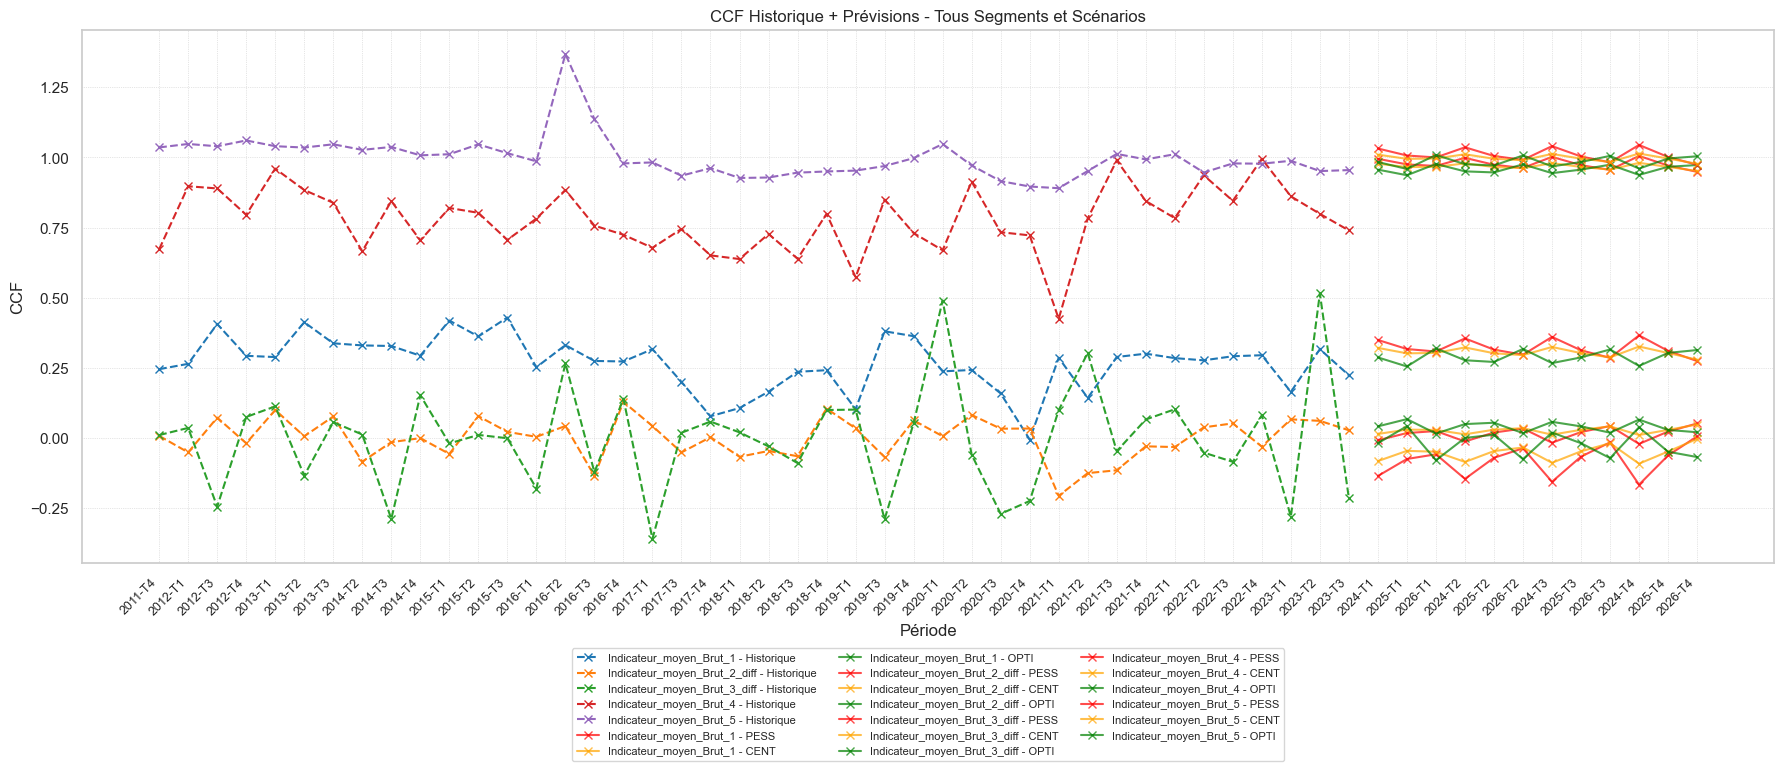

In [26]:
plot_forecast_with_history(projection_df, df_real_melted)

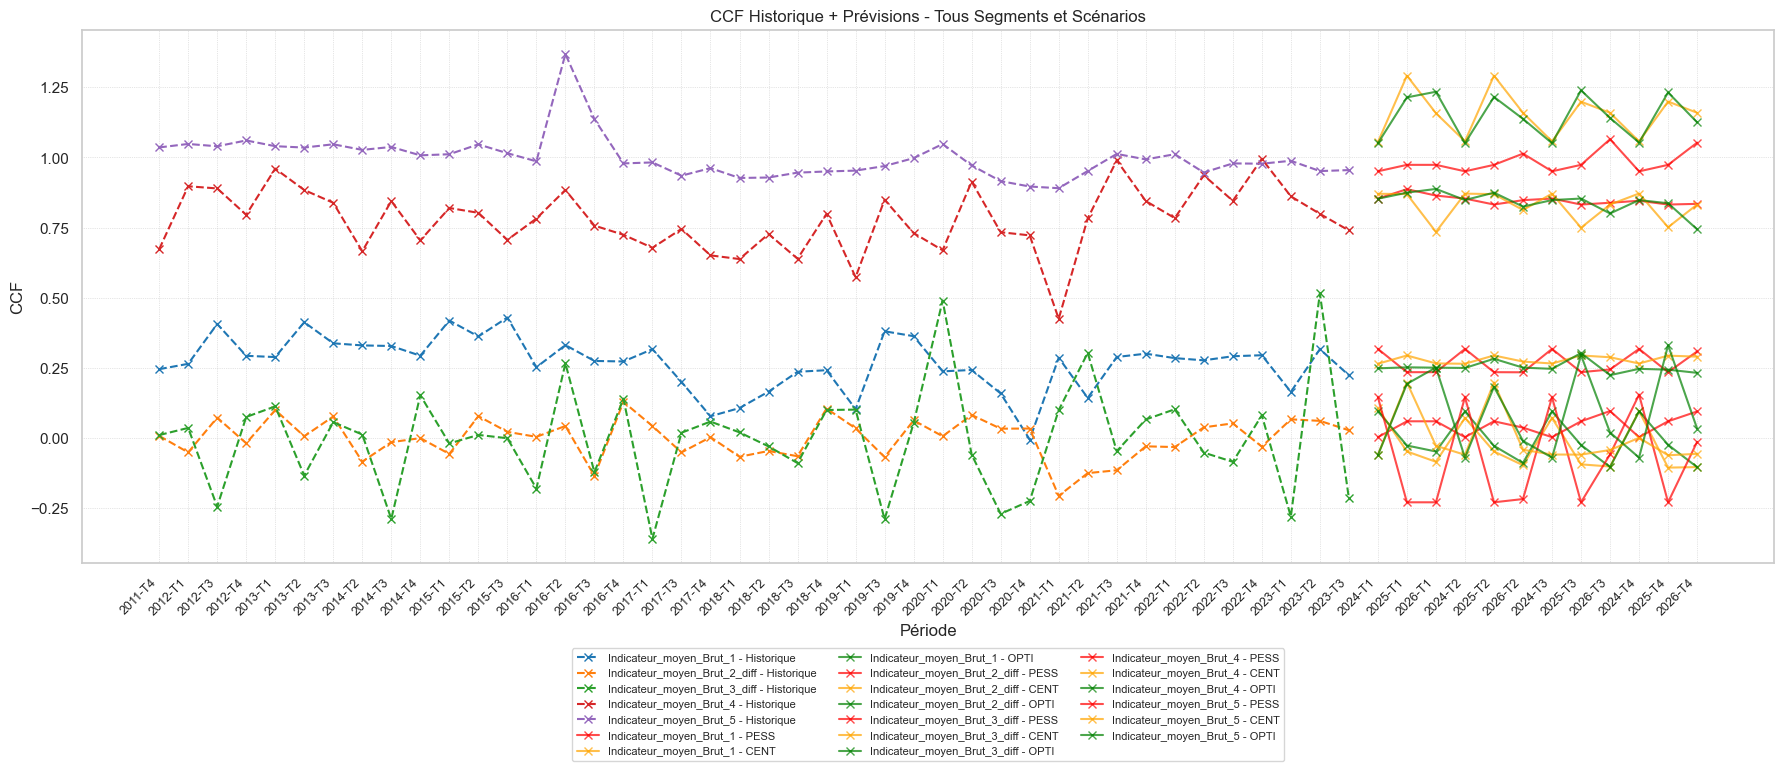

In [27]:
plot_forecast_with_history(projection_df_gb, df_real_melted)

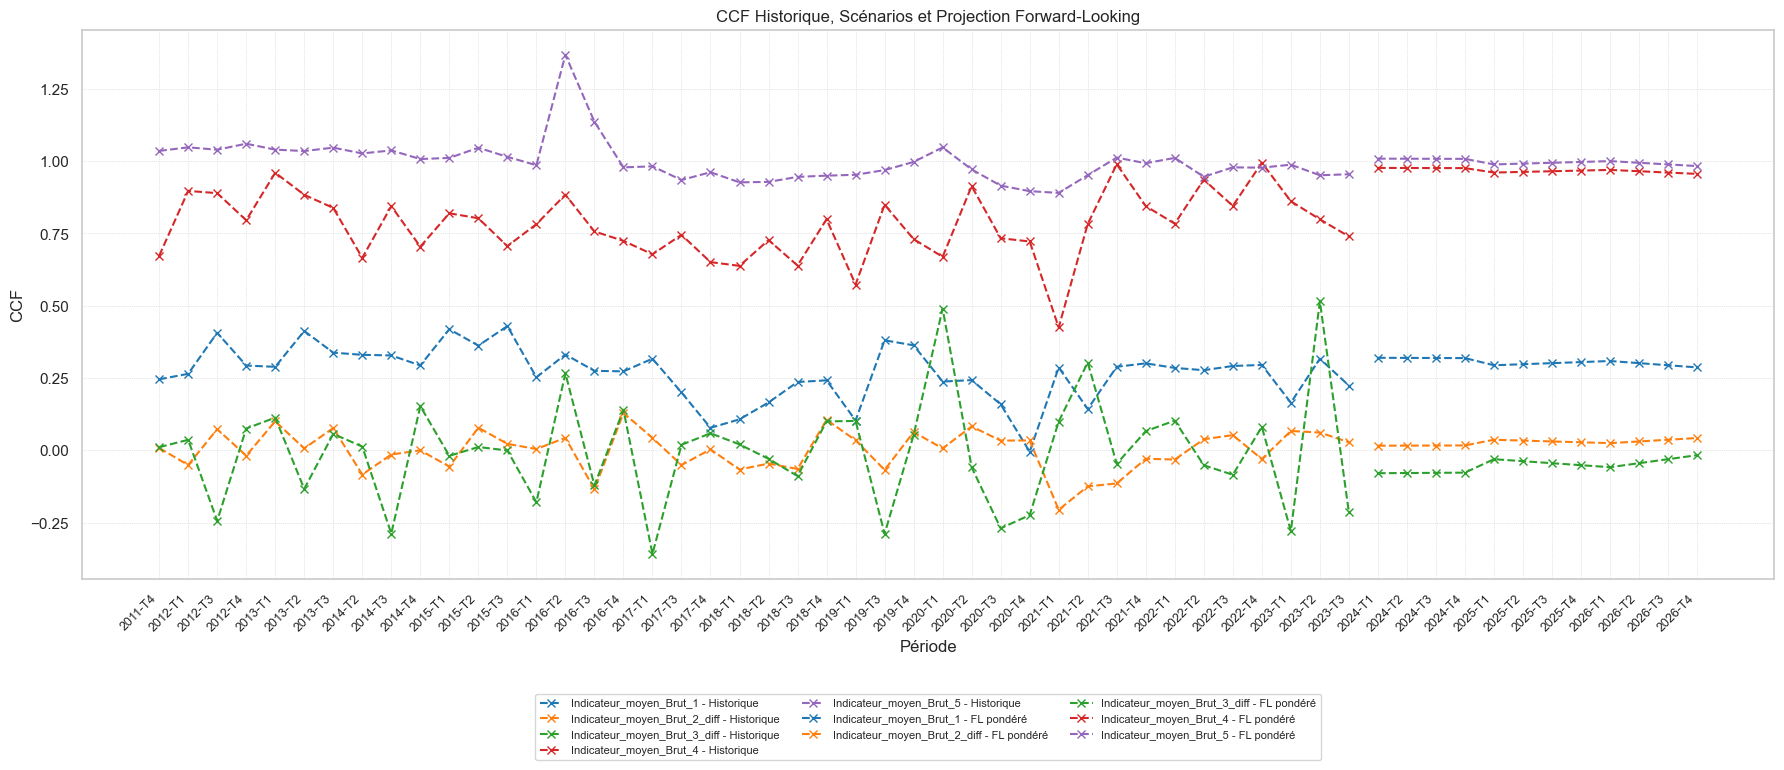

In [28]:
df_fl = compute_forward_looking(projection_df)
plot_forward_looking(df_fl, df_real_melted, projection_df)

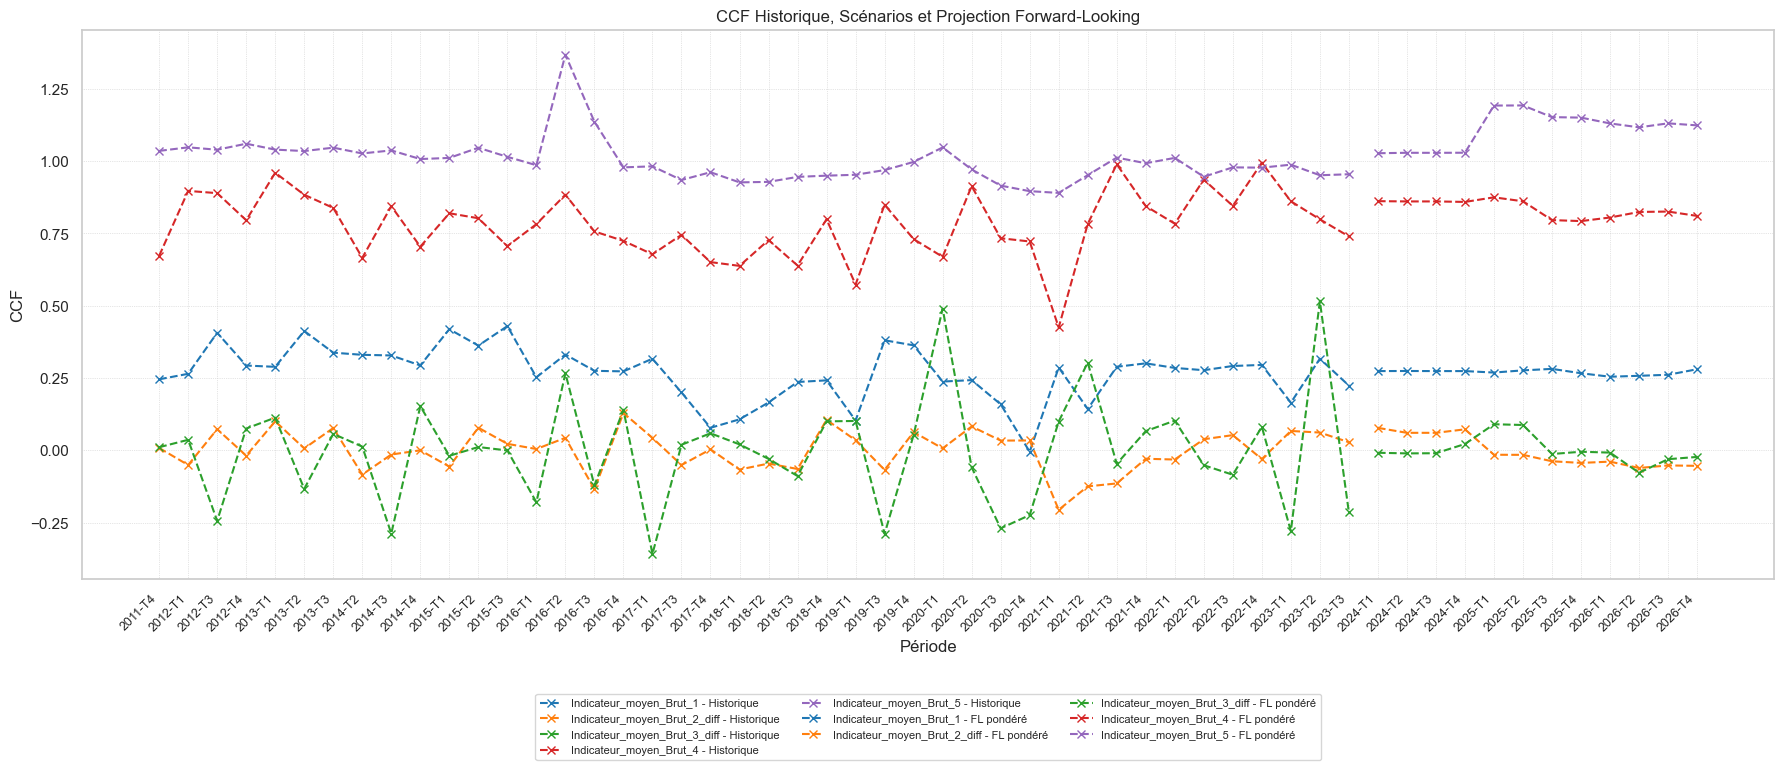

In [29]:
df_fl = compute_forward_looking(projection_df_gb)
plot_forward_looking(df_fl, df_real_melted, projection_df_gb)